In [12]:
# load packages 
library(pacman)
p_load(
    tidyverse, data.table, dtplyr, reshape2, 
    archive, kableExtra, SPARQL, janitor, 
    png, webp, Cairo, rsvg,
    httr, jsonlite)
# set option
options(dplyr.summarise.inform = FALSE)
gray_scale <- c('#F3F4F8','#D2D4DA',  '#bcc0ca', 
                '#D3D3D3', '#343434', 
                '#B3B5BD', '#838383', 
                '#9496A1', '#7d7f89', '#777986', 
                '#656673', '#5B5D6B', '#4d505e',
                '#404352', '#2b2d3b', '#282A3A',
                '#1b1c2a', '#191a2b',
                '#141626', '#101223')

In [3]:
foo <- read_csv('work/notebooks/patent/temp.csv')

Rows: 10 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): IPC_sub
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


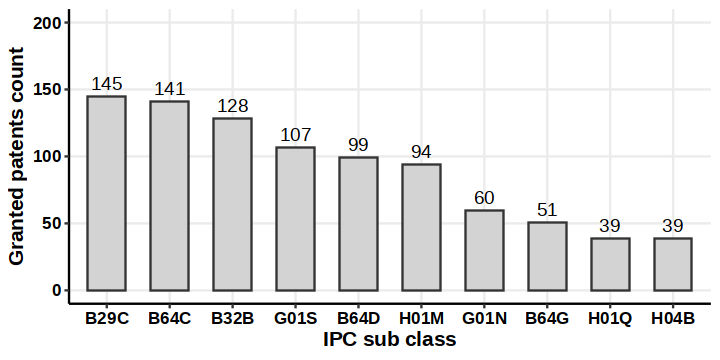

In [15]:
options(repr.plot.width = 6, repr.plot.height = 3)
foo %>%
    ggplot(aes(x=reorder(IPC_sub, -Count), y=Count)) + 
    geom_col(fill=gray_scale[4], color=gray_scale[5], width=0.6) +
    theme_bw() + 
    ylim(0, 200) +
    geom_text(aes(label=Count), vjust=-0.5) + 
    labs(
        x='IPC sub class', 
        y='Granted patents count',
    ) +
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
        axis.text.x=element_text(face='bold', color='black', size=10),
        axis.title.x=element_text(size=12, face='bold'),
        axis.text.y=element_text(face='bold', color='black', size=10),
        axis.title.y=element_text(size=12, face='bold'),
        ) -> p1

p1
    

In [16]:
ggsave(
    p1, 
    file='work/docs/images/blog/airbus_ipc_sub.png',
    width=6, height=3, type="cairo-png",
    device = grDevices::png, 
    dpi=300, bg='transparent')